In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob 

In [16]:
path = "result/Apr13/"
file_name = "RandomForestClassifier_sample50000_feature481.csv"
table_list = ["RandomForestClassifier_sample50000_feature481.csv",
              "MLPClassifier_sample50000_feature481.csv",
             "KNeighborsClassifier_sample50000_feature481.csv",
             "LogisticRegression_sample50000_feature481.csv"]

In [46]:
result_files = 'result/Apr18/*_sample50000_feature16.csv'

In [40]:
result_files = 'result/Apr18/*deepset_*_feature141.csv'

In [47]:
def produce_fig(result_files, save_name):
    plt.figure(figsize=(14, 5))
    for i in sorted(glob(result_files)):
        table = pd.read_csv(i, index_col=0)
        table = table.sort_index()
#         model_name = i.split('/')[-1].split("_")[1].split('0')[0]
        model_name = i.split('/')[-1].split("_")[0]#.split('0')[0]
#         number_cell = "_".join(i.split("_")[1:2])[6:11]
        feature_size = i.split('/')[-1].split("feature")[1].split('.csv')[0]
        ax = plt.subplot(1,2,1)
        plt.plot(table.index, table["mean_accuracy"], '-',label = model_name)
        plt.fill_between(table.index, 
                     (table["mean_accuracy"])-table["std_accuracy"], table["mean_accuracy"]+table["std_accuracy"], alpha=0.2)
        ax.legend()
        if 'deepset' in i:
            ax.set_title("Accuracy score of deepset models with %s feature" %feature_size)
        else: 
            ax.set_title("Accuracy score of traditional models with %s feature" %feature_size)
        ax = plt.subplot(1,2,2)
        z_score = 1-3*(table["std_pred_score_treatment"]+table["std_pred_score_control"])/(np.abs(table["mean_pred_score_treatment"]-table["mean_pred_score_control"]))
        plt.plot(table.index, z_score, '-', label = model_name)
        if 'deepset' in i:
            ax.set_title("Z' score of deepset models with %s feature" %feature_size)
        else:
            ax.set_title("Z' score of traditional models with %s feature" %feature_size)
        ax.legend()
    plt.savefig(save_name)

<ipython-input-47-ce275239b9c8>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,2,1)
<ipython-input-47-ce275239b9c8>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,2,2)
<ipython-input-47-ce275239b9c8>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be crea

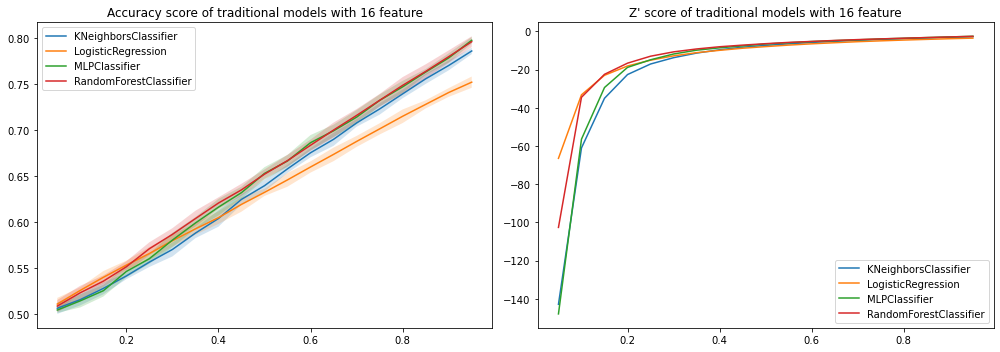

In [48]:
produce_fig(result_files, 'set.png')
plt.tight_layout()

<ipython-input-65-299cda84e711>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,2,1)
<ipython-input-65-299cda84e711>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1,2,2)
<ipython-input-65-299cda84e711>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be create

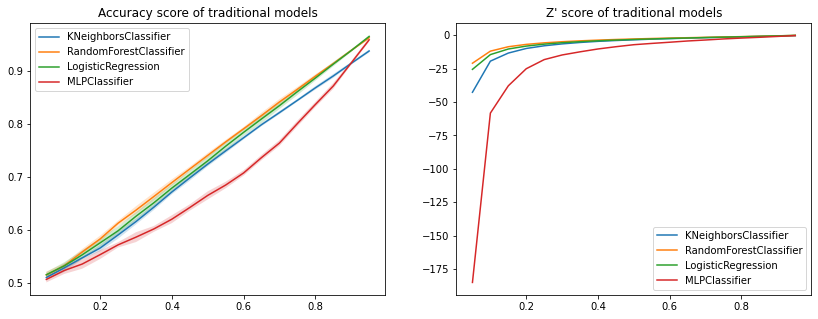

In [68]:
produce_fig(result_files, 'test.png')